# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

First off, let's load the dataset through torchvision.

In [7]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

torch.Size([64, 1, 28, 28])


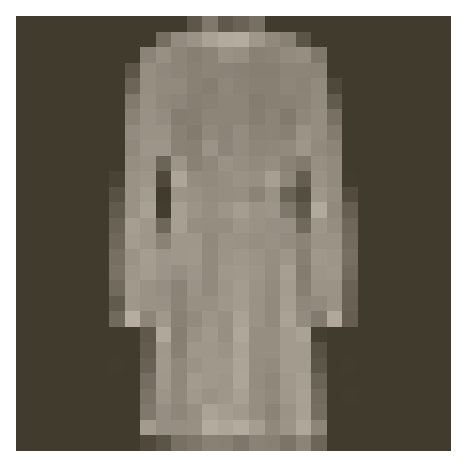

In [18]:
image, label = next(iter(trainloader))
print(image.shape)
helper.imshow(image[0,:]);

In [10]:
from torch import nn
import torch.nn.functional as F
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),                      
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax(dim=1))

# Train the network


In [11]:
criterion = nn.NLLLoss()
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.05)


In [12]:
epochs = 10
for e in range(epochs):
    running_loss=0
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss+= loss.item()
    else:
        print("Training loss {}".format(running_loss/len(trainloader)))

Training loss 0.7933824362912412
Training loss 0.45923311133056816
Training loss 0.39958762150329313
Training loss 0.3698579298614312
Training loss 0.3464688918928602
Training loss 0.32979791933920843
Training loss 0.313158644907383
Training loss 0.300764309842068
Training loss 0.29058255650786197
Training loss 0.28044323963937223


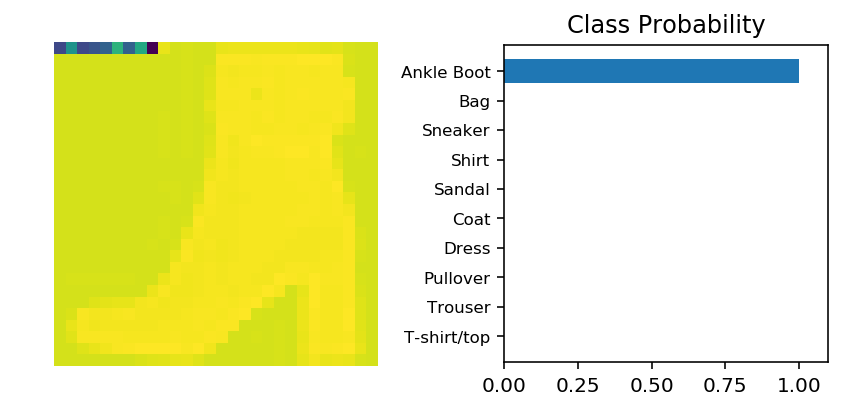

In [17]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

with torch.no_grad():
    img=model(img)
    
ps = F.softmax(img, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')